# Question 1.1

In [1]:
def carrottime(adult,elderly, young):
    goout = (adult+elderly+young)/3 * 2
    hour = goout - 2
    if hour == 1:
        return f'{hour}, 1PM'
    if hour == 2:
        return f'{hour}, 2PM'
    if hour == 3:
        return f'{hour}, 3PM'
    if hour == 4:
        return f'{hour}, 4PM'
    if hour == 5:
        return f'{hour}, 5PM'
    if hour == 6:
        return f'{hour}, 6PM'

# Question 1.2

In [3]:
def rect():
    level = int(input('Level :'))
    print('level :',level)
    for i in range(level):
        print('*'*level)

In [4]:
rect()

level : 3
***
***
***


In [5]:
rect()

level : 5
*****
*****
*****
*****
*****


In [109]:
def tri():
    rows = int(input("Level: "))
    print('level :',rows)
    for i in range(rows+1):
        for j in range(rows, 0, -1):
            if j > i:
                print(" ", end=' ')
            else:
                print('*', end=' ')
        print()

In [110]:
tri()

level : 3
      
    * 
  * * 
* * * 


In [111]:
tri()

level : 5
          
        * 
      * * 
    * * * 
  * * * * 
* * * * * 


In [13]:
def pyr():
    rows = int(input("Level: "))
    print('level :',rows)
    for i in range(rows):
        star = 2*i+1
        print('*'*star)

In [14]:
pyr()

level : 3
*
***
*****


In [117]:
pyr()

level : 5
        * 
      * * * 
    * * * * * 
  * * * * * * * 
* * * * * * * * * 


In [118]:
import sys
class MyShape():
    def __init__(self,number,text):
        self.number = number
        self.text = text

    def setLevel(self,number):
        self.number = number

    def setShape(self,text):
        self.text = text
        if self.text != 'tri' or 'sqr' or'pyr':
            raise ValueError(": ..........")

    def square(self):
        for i in range(self.number):
            for j in range(self.number):
                print('*',end='')
            print()

    def triangle(self):
        for i in range(self.number+1):
            for j in range(self.number, 0, -1):
                if j > i:
                    print(" ", end=' ')
                else:
                    print('*', end=' ')
            print()

    def pyramid(self):
        k = 0
        for i in range(1, self.number+1):
            for space in range(1, (self.number-i)+1):
                print(end="  ")
        
            while k!=(2*i-1):
                print("* ", end="")
                k += 1
        
            k = 0
            print()

    def show(self):
        if self.text == 'tri':
            self.triangle()
        elif self.text == 'squ':
            self.square()
        elif self.text == 'pyr':
            self.pyramid()

In [119]:
ms = MyShape(2,'tri')
ms.show()

    
  * 
* * 


In [120]:
ms.setLevel(3)
ms.setShape('sqr')
ms.show()

In [121]:
ms.setShape('a')

# Question 2

In [77]:
from sklearn.model_selection import KFold
import numpy as np

class LinearRegression():
    kfold = KFold(n_splits=5)
    def __init__(self,max_iter=1000,alpha=0.0001,num_epochs=5,batch_size=50,method='batch',
        cv=kfold):
        self.max_iter = max_iter
        self.alpha = alpha
        self.num_epochs = num_epochs
        self.batch_size = batch_size
        self.method = method
        self.cv = cv

    def predict(self,X):
        y_pred = X @ self.theta
        return y_pred

    def mean_squared_error(self,y_hat,y):
        return ((y_hat - y)**2).sum() /y.shape[0]

    def _gradient(self,X,error):
        return X.T @ error
        
    def cross_validation(X,fold=3):
        dataset_split = list()
        return dataset_split

    def fit(self,X_train, y_train):
        #using training .......

        #create a list of kfold scores
        self.kfold = list()

        #please change it ot cross-validation
        for fold,(train_idx, val_idx) in enumerate(self.cv.split(X_train)):
            X_cross_train, X_cross_val = X_train[train_idx], X_train[val_idx]
            y_cross_train, y_cross_val = y_train[train_idx], y_train[val_idx]

            #create self.theta
            self.theta = np.zeros(X_cross_train.shape[1]) #based on features

            #define X_train as only a subset of the data
            #how big is this subset ? mini-batch size ==> 50
            
            #one epoch will exhaust the WHOLE training set
            for epoch in range(self.num_epochs):
                #with replacement or no replacement
                #with replacement mean jsut randomize
                #with no replace menes 0:50 51:100 101:150.... 300:323
                #shuffle you index
                #===> please shuffle your index
                perm = np.random.permutation(X_cross_train.shape[0]) #return as a list of index
                # print(permuted_index)
                X_cross_train = X_cross_train[perm]
                y_cross_train = y_cross_train[perm]

                if self.method == 'mini':
                    for batch_idx in range(0,X_cross_train.shape[0], self.batch_size):
                        #batch_idx = 0,50,100,150
                        X_method_train = X_cross_train[batch_idx:batch_idx+self.batch_size,:]
                        y_method_train = y_cross_train[batch_idx:batch_idx+self.batch_size]
                        # print(X_method_train.shape)
                        self._train(X_method_train, y_method_train)
                elif self.method == 'sto':
                    for sto_idx in range(0,X_cross_train.shape[0]):
                        X_method_train = X_cross_train[sto_idx,:].reshape(1,-1) #(11,) => (1,11)
                        y_method_train = y_cross_train[sto_idx]
                        # print(X_method_train.shape)
                        self._train(X_method_train, y_method_train)
                else: #'batch gradient_descent'
                    X_method_train = X_cross_train
                    y_method_train = y_cross_train
                    self._train(X_method_train, y_method_train)
            #print the validation
            yhat_val = self.predict(X_cross_val)
            self.kfold.append(self.mean_squared_error(y_cross_val,yhat_val))
            # print(f'Fold {fold:} : {mean_squared_error(y_cross_val,yhat_val)}')

    def _train(self, X, y):
        y_hat = self.predict(X)
        #1.1 Optionally, print loss
        # mse = self.mean_squared_error(y_hat,y_train)
        #2.get gradient
        deriv = self._gradient(X, y_hat - y)
        #3. adjust theta/coef
        self.theta = self.theta - self.alpha*deriv

    def _coef(self): #<------ basically theta
        return self.theta[1:]   #remind that theta is (w0,w1,w2,w3,w4,....,wn)
                                #w0 is the bias or the intercepts
                                #w1 .... wn are the weights/ coefficients / theta

    def _bias(self):
        return self.theta[0]    

In [78]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import timeit
def drawLine(p1,p2): 
    x1,y1 = p1
    x2,y2 = p2
    a = (y2-y1)/(x2-x1)
    b = y1 - a*x1
    
    print('Linear Equation')
    print(f'a : {a} b : {b}')

    _x = [x1,x2]
    _y = [y1,y2]

    X = np.linspace(x1,x2,1000)
    y = a*X + b
    X = X.reshape(-1,1)
    X = np.insert(X,0,1,axis=1)

    lr = LinearRegression()
    lr.fit(X,y)
    al = lr._coef()[0]
    bl = lr._bias()

    xp = np.array([[1,x1],[1,x2]])
    ypred = lr.predict(xp)
    print('Linear Regression Equation')
    print(f'a : {al} b : {bl}')

    plt.subplot(1,2,1)
    plt.title('Normal')
    plt.scatter(_x,_y)
    plt.plot(_x,_y)

    plt.subplot(1,2,2)
    plt.title('Linear Regression')
    plt.scatter(_x,_y)
    plt.plot(_x,ypred)
    plt.show()
    


Linear Equation
a : 0.6428571428571429 b : 0.3571428571428571
Linear Regression Equation
a : 301.74629829701837 b : 37.01298431063539


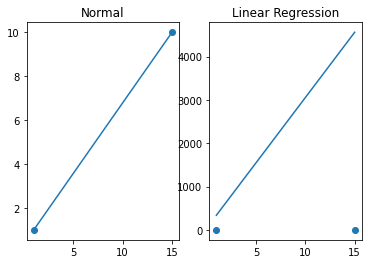

In [79]:
drawLine((1,1),(15,10))

# Question 3

In [80]:
import pandas as pd
import numpy as np
df = pd.read_csv('howlongwelive.csv')

In [81]:
df.shape

(2938, 22)

In [82]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [83]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [84]:
df.rename(columns = {'Country':'country', 
                     'Year':'year', 
                     'Status':'status', 
                     'Life expectancy ':'life-exp', 
                     'Adult Mortality':'adult-mort',
                     'infant deaths':'infant-deaths', 
                     'Alcohol':'alcohol', 
                     'percentage expenditure':'per-exp', 
                     'Hepatitis B':'hepa',
                     'Measles ':'measles', 
                     ' BMI ':'bmi', 
                     'under-five deaths ':'under-five-deaths', 
                     'Polio':'polio', 
                     'Total expenditure':'total-exp',
                     'Diphtheria ':'dip', 
                     ' HIV/AIDS':'hiv', 
                     'GDP':'gdp', 
                     'Population':'pop',
                     ' thinness  1-19 years':'thin1-19', 
                     ' thinness 5-9 years':'thin5-9',
                     'Income composition of resources':'income', 
                     'Schooling':'school'}, inplace = True)

In [85]:
df.columns

Index(['country', 'year', 'status', 'life-exp', 'adult-mort', 'infant-deaths',
       'alcohol', 'per-exp', 'hepa', 'measles', 'bmi', 'under-five-deaths',
       'polio', 'total-exp', 'dip', 'hiv', 'gdp', 'pop', 'thin1-19', 'thin5-9',
       'income', 'school'],
      dtype='object')

In [86]:
df.isnull().sum()

country                0
year                   0
status                 0
life-exp              10
adult-mort            10
infant-deaths          0
alcohol              194
per-exp                0
hepa                 553
measles                0
bmi                   34
under-five-deaths      0
polio                 19
total-exp            226
dip                   19
hiv                    0
gdp                  448
pop                  652
thin1-19              34
thin5-9               34
income               167
school               163
dtype: int64

In [87]:
#define two lists, one for median and one for mean
fill_mean = ['bmi']

col_with_missing_value= df.columns[df.isna().any()]
fill_median = set(col_with_missing_value) - set(fill_mean)

In [88]:
#let's fill now!
for col in fill_mean:
    df[col].fillna(df[col].mean(), inplace=True)
    
#let's fill now!
for col in fill_median:
    df[col].fillna(df[col].median(), inplace=True)

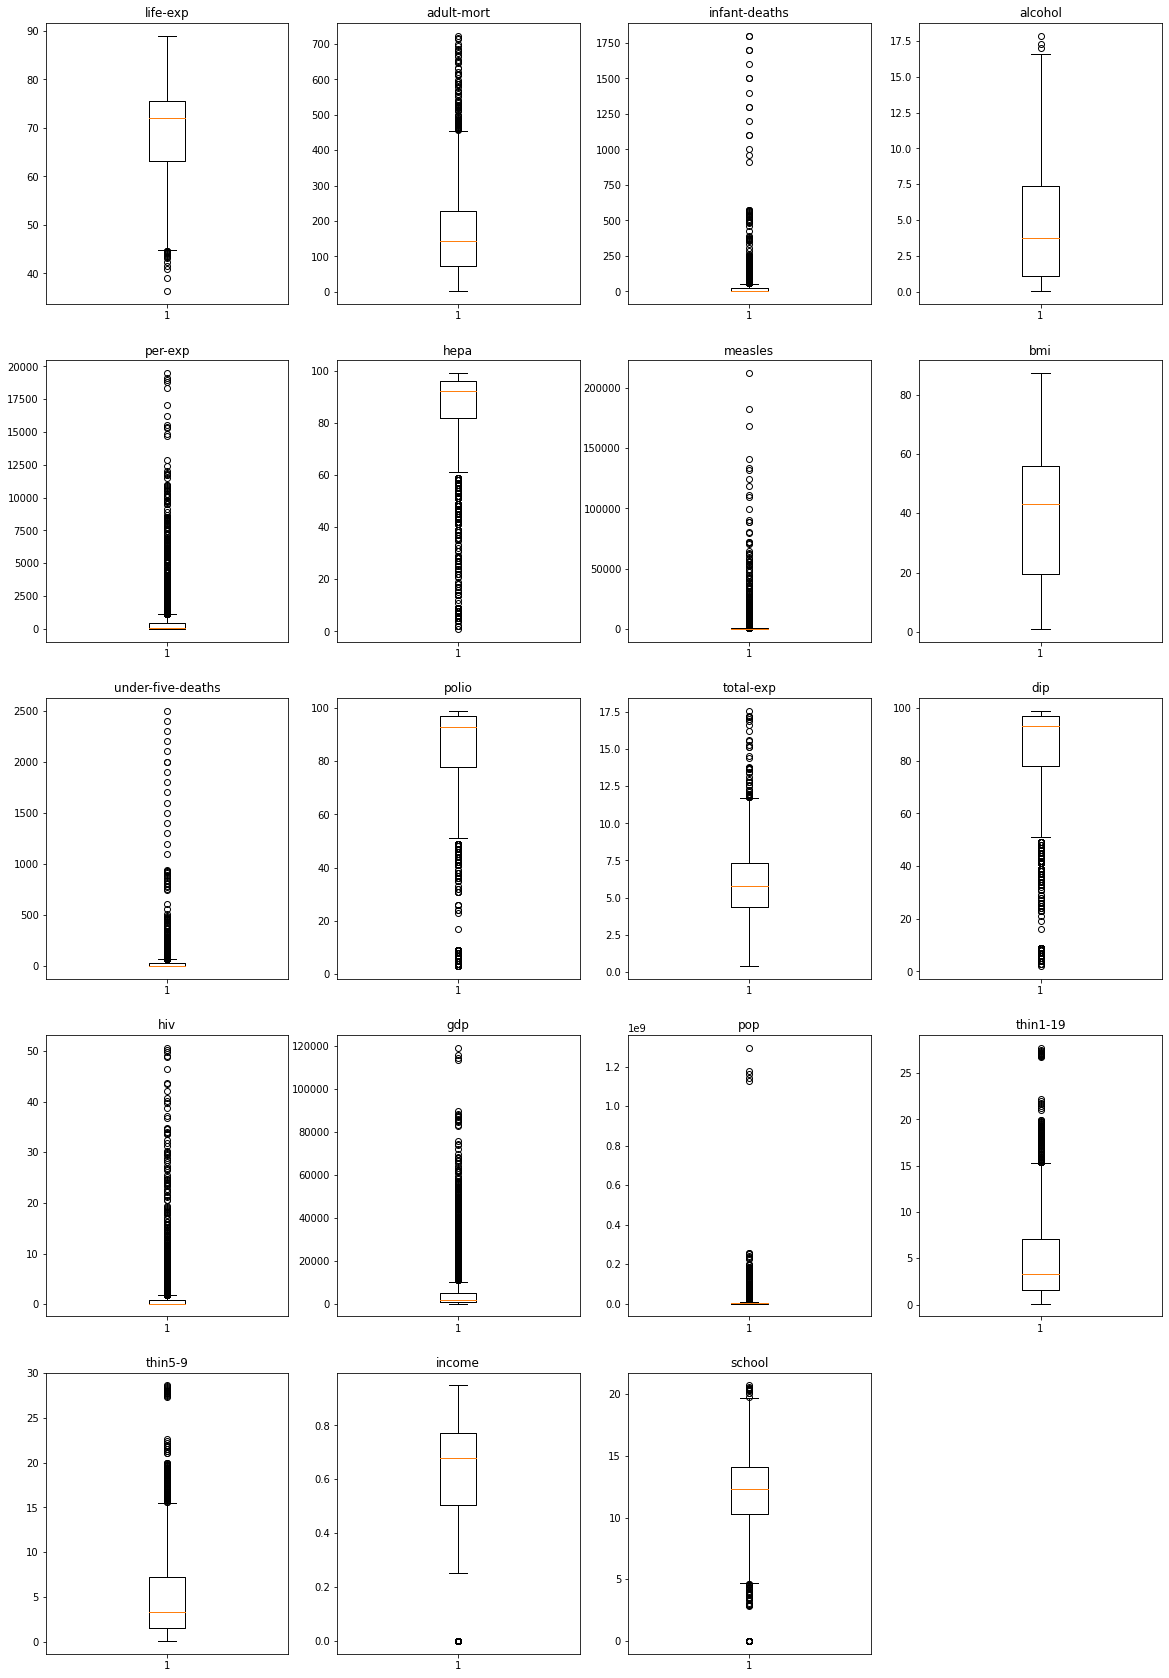

In [90]:
# Create a dictionary of columns.
col_dict = {'life-exp':1,'adult-mort':2,'infant-deaths':3,'alcohol':4,'per-exp':5,
            'hepa':6,'measles':7,'bmi':8,'under-five-deaths':9,'polio':10,'total-exp':11,'dip':12,
            'hiv':13,'gdp':14,'pop':15,'thin1-19':16,'thin5-9':17,'income':18,'school':19}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(df[variable])
                     plt.title(variable)

plt.show()

In [91]:
#find categorial and numerical column so we can plot stuffs easily
categorical = df.select_dtypes(include=['object'])
numerical = df.select_dtypes(exclude= ['object'])

In [92]:
#common ways to deal with outliers

# Write a function to count and calculate the percentage of the outliers, 
# calculate the 25%, 75% and inter quatile 
# so that you can find the min and max values
# and so that you can "count" how many values that are less than min value or more than max values
# and so that you can calculate the percentage of the outlier
def outlier_count(col, data = df):
    
    # calculate your 25% quatile and 75% quatile
    q75, q25 = np.percentile(data[col], [75, 25])
    
    # calculate your inter quatile
    iqr = q75 - q25
    
    # min_val and max_val
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    # count number of outliers, which are the data that are less than min_val or more than max_val calculated above
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    
    # calculate the percentage of the outliers
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    
    if(outlier_count > 0):
        print("\n"+15*'-' + col + 15*'-'+"\n")
        print('Number of outliers: {}'.format(outlier_count))
        print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [93]:
for col in numerical.columns:
    outlier_count(col)


---------------life-exp---------------

Number of outliers: 17
Percent of data that is outlier: 0.58%

---------------adult-mort---------------

Number of outliers: 86
Percent of data that is outlier: 2.93%

---------------infant-deaths---------------

Number of outliers: 315
Percent of data that is outlier: 10.72%

---------------alcohol---------------

Number of outliers: 3
Percent of data that is outlier: 0.1%

---------------per-exp---------------

Number of outliers: 389
Percent of data that is outlier: 13.24%

---------------hepa---------------

Number of outliers: 322
Percent of data that is outlier: 10.96%

---------------measles---------------

Number of outliers: 542
Percent of data that is outlier: 18.45%

---------------under-five-deaths---------------

Number of outliers: 394
Percent of data that is outlier: 13.41%

---------------polio---------------

Number of outliers: 279
Percent of data that is outlier: 9.5%

---------------total-exp---------------

Number of outlier

### Label Encoding

In [94]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["status"] = le.fit_transform(df["status"])

df["status"].unique()

array([1, 0])

In [95]:
# we can call le.classes_ to know what it maps to
le.classes_

array(['Developed', 'Developing'], dtype=object)

In [ ]:
# then we can try transform
le.transform(["Developed", "Developing"])

### 3. Exploratory Data Analysis

c:\Python3.10.4\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='status', ylabel='count'>

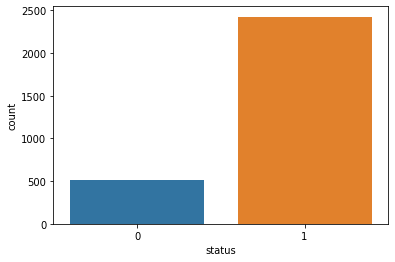

In [98]:
import seaborn as sns
# Let's see how many developing and developed countries there are
sns.countplot(df['status'])

c:\Python3.10.4\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


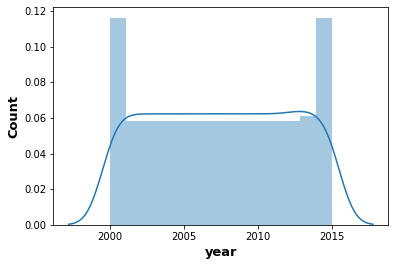

c:\Python3.10.4\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


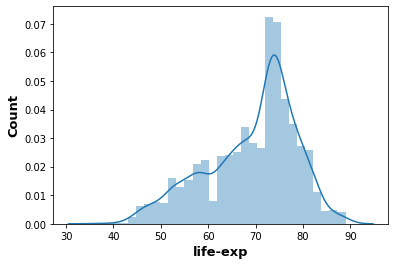

c:\Python3.10.4\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


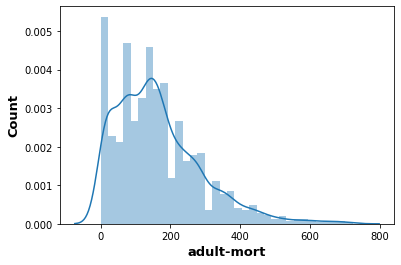

c:\Python3.10.4\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


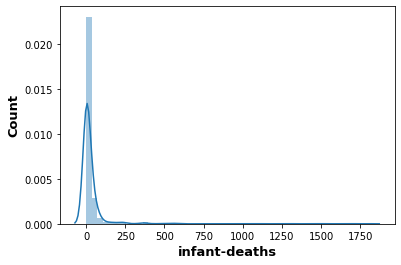

c:\Python3.10.4\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


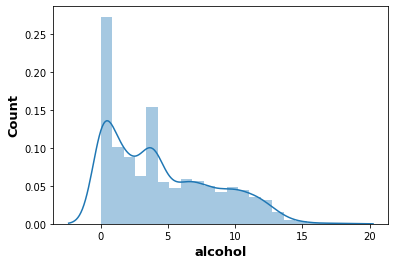

c:\Python3.10.4\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


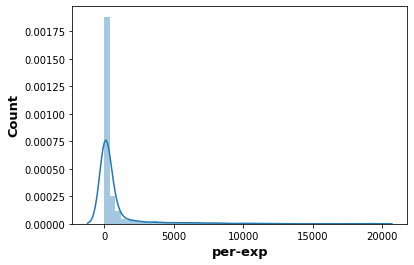

c:\Python3.10.4\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


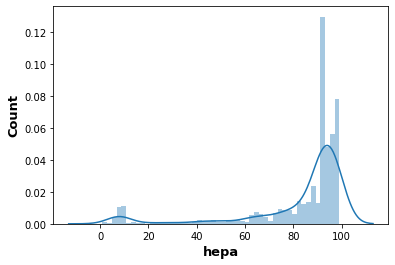

c:\Python3.10.4\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


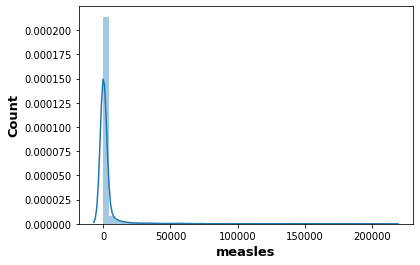

c:\Python3.10.4\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


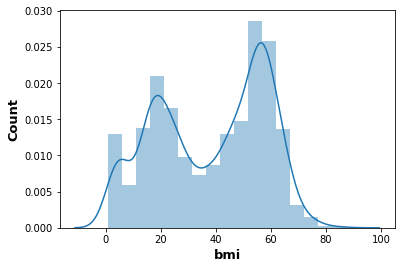

c:\Python3.10.4\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


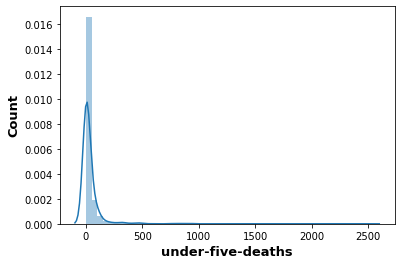

c:\Python3.10.4\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


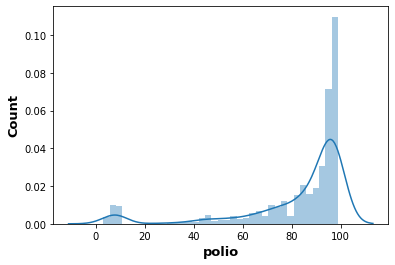

c:\Python3.10.4\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


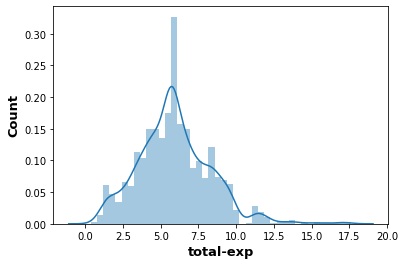

c:\Python3.10.4\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


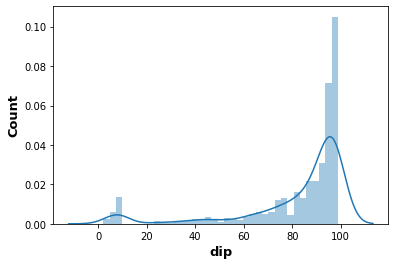

c:\Python3.10.4\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


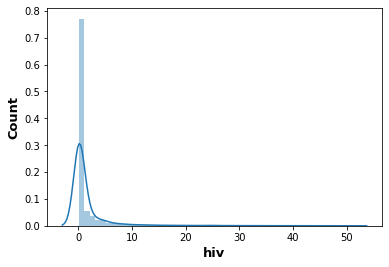

c:\Python3.10.4\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


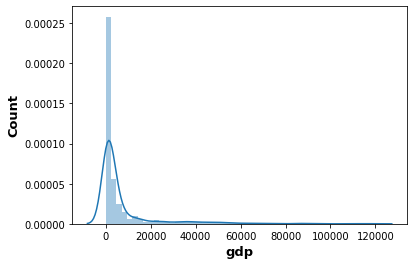

c:\Python3.10.4\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


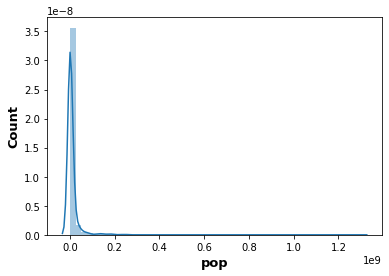

c:\Python3.10.4\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


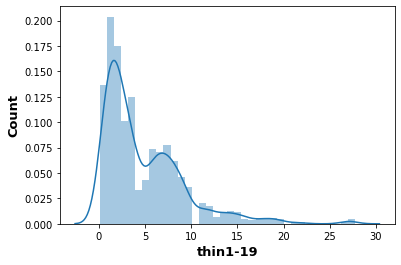

c:\Python3.10.4\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


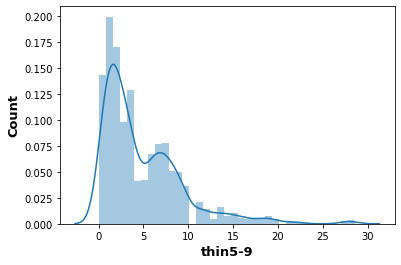

c:\Python3.10.4\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


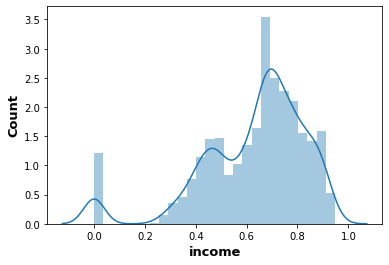

c:\Python3.10.4\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


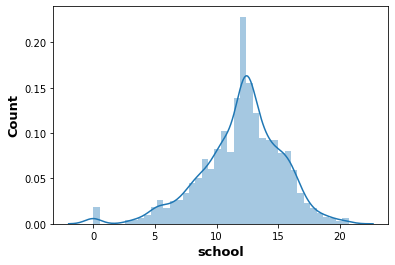

In [99]:
# Let's plot all columns with numberical data using displot
for col in numerical.columns:
    sns.distplot(numerical[col]); 
    plt.ylabel("Count", fontsize= 13, fontweight="bold")
    plt.xlabel(col, fontsize=13, fontweight="bold")
    plt.show()

Text(0.5, 0, 'Status')

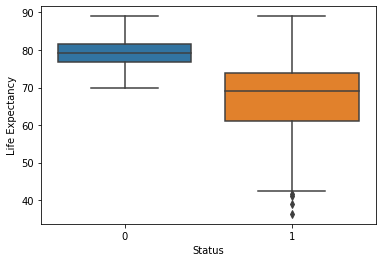

In [100]:
# Let's try bar plot on "Status"
sns.boxplot(x = df["status"], y = df["life-exp"]);
plt.ylabel("Life Expectancy")
plt.xlabel("Status")

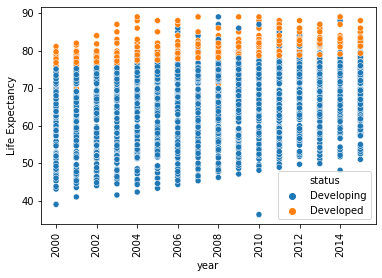

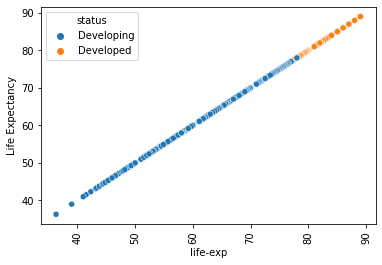

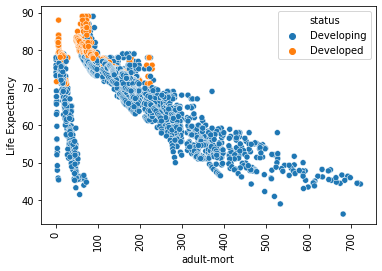

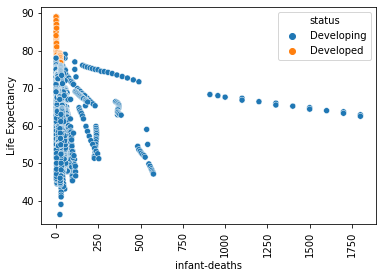

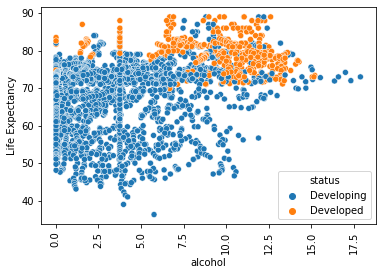

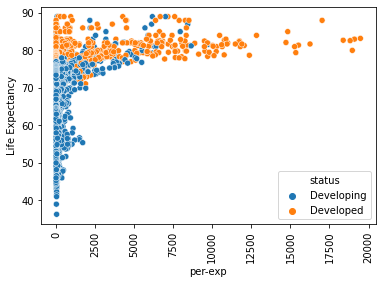

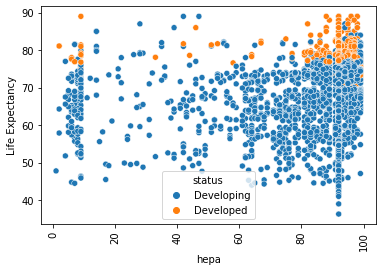

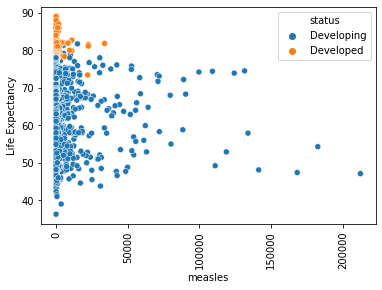

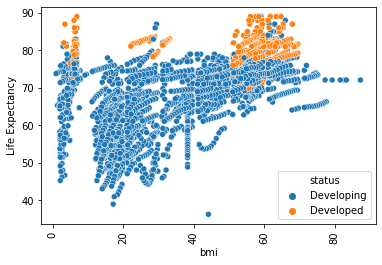

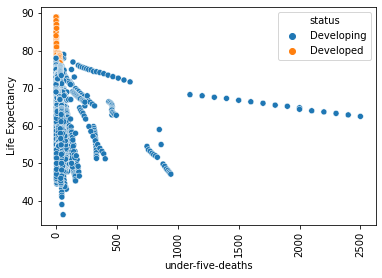

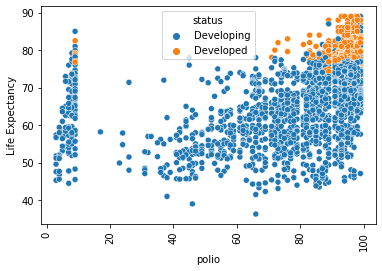

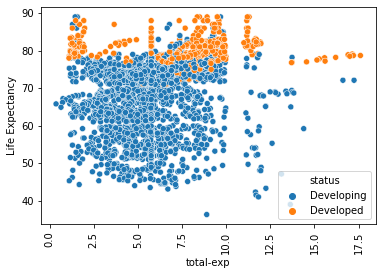

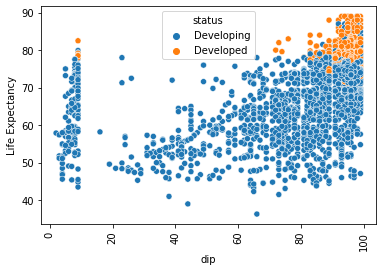

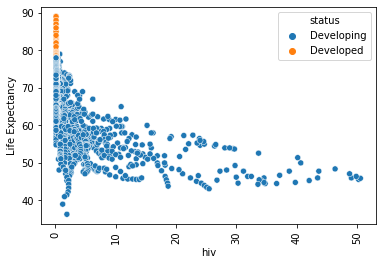

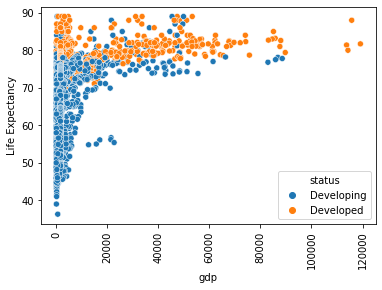

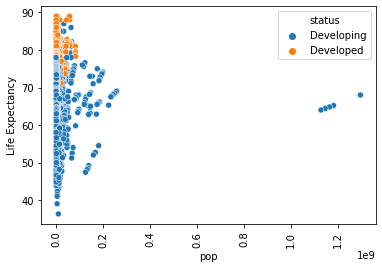

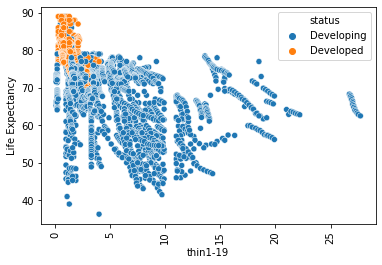

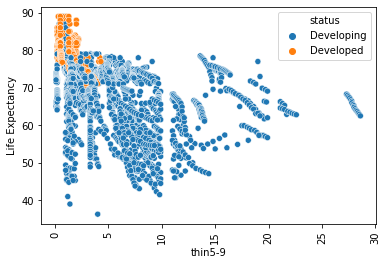

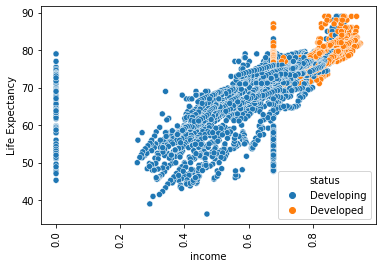

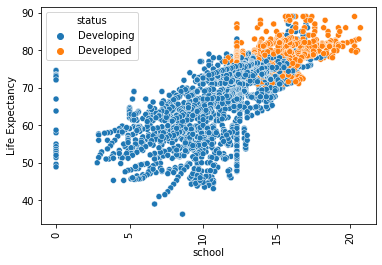

In [101]:
# And scatterplot of all columns of developing vs developed countries
# Make sure to use different colours to indicate the statuses
for col in numerical.columns:
    sns.scatterplot(x = numerical[col], y =  df["life-exp"], hue = categorical.status)  #hue is the color
    plt.xticks(rotation=90)
    plt.ylabel("Life Expectancy")
    plt.xlabel(col)
    plt.show()

<AxesSubplot:>

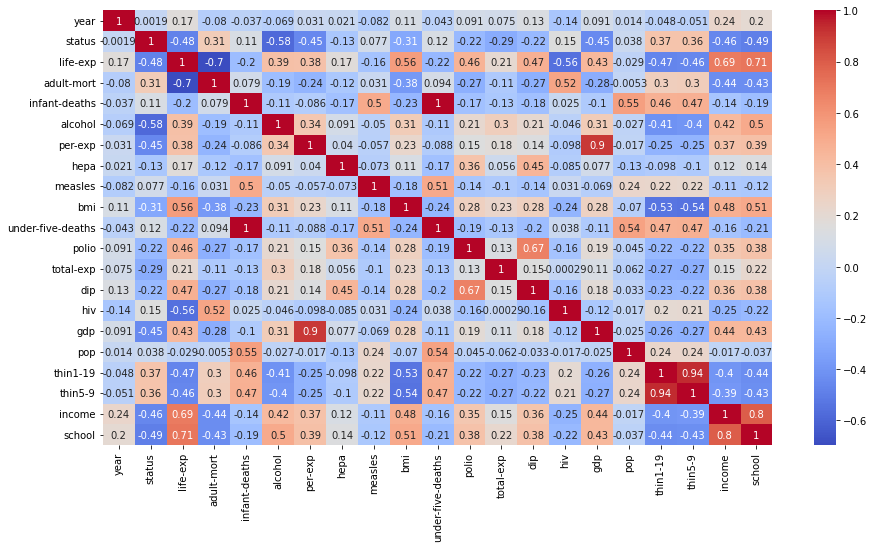

In [102]:
# Let's check out heatmap
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")  #don't forget these are not all 

In [103]:
import ppscore as pps

# before using pps, let's drop country and year
dfcopy = df.copy()
dfcopy.drop(['country', 'year'], axis='columns', inplace=True)

#this needs some minor preprocessing because seaborn.heatmap unfortunately does not accept tidy data
matrix_df = pps.matrix(dfcopy)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

#plot
plt.figure(figsize = (15,8))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

# Let's check out heatmap
# sns.heatmap(pps.matrix(dfcopy), annot=True, cmap="coolwarm")  #don't forget these are not all variables! categorical is not here...

ModuleNotFoundError: No module named 'ppscore'

In [105]:
df.drop(['pop'], axis='columns', inplace=True)

#### 4. Modeling

In [106]:
df.columns

Index(['country', 'year', 'status', 'life-exp', 'adult-mort', 'infant-deaths',
       'alcohol', 'per-exp', 'hepa', 'measles', 'bmi', 'under-five-deaths',
       'polio', 'total-exp', 'dip', 'hiv', 'gdp', 'thin1-19', 'thin5-9',
       'income', 'school'],
      dtype='object')

In [107]:
#we gonna drop more columns
X = df.drop(['country', 'year', 'life-exp'], axis = 'columns')

#y is simply the life expectancy col
y = df["life-exp"]